# 데이터 불러오기

In [1]:
#pip install statsmodels

In [2]:
# pip install scikit-learn

In [3]:
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

In [4]:
# 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('data/final_merged_update_store_df.csv')

In [7]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [8]:
data.shape

(3930, 30)

In [9]:
list(data.columns)

['기준_년',
 '기준_분기',
 '상권_구분_코드',
 '상권_구분_코드_명',
 '상권_코드',
 '상권_코드_명',
 '자치구_코드',
 '자치구_코드_명',
 '행정동_코드',
 '행정동_코드_명',
 '시간대',
 '시간대_매출금액',
 '시간대_유동인구_수',
 '평일_유동인구_수_평균',
 '주말_유동인구_수_평균',
 '총_직장_인구_수',
 '총_상주인구_수',
 '총_가구_수',
 '집객시설_수',
 '월_평균_소득_금액',
 '소득_구간_코드',
 '지출_총금액',
 '점포_수',
 '유사_업종_점포_수',
 '개업_율',
 '개업_점포_수',
 '폐업_률',
 '폐업_점포_수',
 '프랜차이즈_점포_수',
 '영역_면적']

In [10]:
data.head()

,기준_년,기준_분기,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,평일_유동인구_수_평균,주말_유동인구_수_평균,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,소득_구간_코드,지출_총금액,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,영역_면적
0,2021,1,A,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,00~06,377166450.0,738999.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0
1,2021,1,A,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,06~11,222467605.0,621019.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0
2,2021,1,A,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,11~14,192457360.0,351383.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0
3,2021,1,A,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,14~17,230188421.0,342564.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0
4,2021,1,A,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,17~21,531497598.0,433632.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0


### 우선 통계 분석에 불필요한 데이터 제외

In [11]:
data = data.drop(columns=['상권_구분_코드', '상권_코드', '자치구_코드', '행정동_코드', '자치구_코드_명', '평일_유동인구_수_평균', '주말_유동인구_수_평균', '소득_구간_코드', '점포_수', '개업_율', '폐업_률', '프랜차이즈_점포_수'])
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0


# EDA

#### 2021 ~ 2023년 분기별 편의점 수

In [12]:
# 데이터프레임에서 필요한 열만 추출
data_count = data[['기준_년', '기준_분기', '상권_코드_명', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수']]

# 기준_년과 기준_분기별로 유사_업종_점포_수와 개업_점포_수의 고유값(unique value) 및 합을 계산
unique_and_sum_by_year_quarter = data_count.groupby(['기준_년', '기준_분기', '상권_코드_명']).agg({'유사_업종_점포_수': lambda x: x.unique().sum(), '개업_점포_수': lambda x: x.unique().sum(), '폐업_점포_수': lambda x: x.unique().sum(), '유사_업종_점포_수': 'sum', '개업_점포_수': 'sum', '폐업_점포_수': 'sum'})

# 기준_년과 기준_분기별로 유사_업종_점포_수와 개업_점포_수의 합을 계산
sum_by_year_quarter = unique_and_sum_by_year_quarter.groupby(['기준_년', '기준_분기']).sum()

# 결과 출력
sum_by_year_quarter

유사_업종_점포_수  개업_점포_수  폐업_점포_수
기준_년 기준_분기                              
2021 1          4920.0    150.0    168.0
     2          4962.0    192.0    174.0
     3          4890.0     96.0    180.0
     4          4896.0    108.0    126.0
2022 1          4854.0     48.0     90.0
     2          4776.0     60.0    138.0
     3          4728.0     78.0    126.0
     4          4698.0     84.0    126.0
2023 1          4698.0    102.0    102.0
     2          4746.0    144.0     96.0
     3          4686.0     90.0    126.0

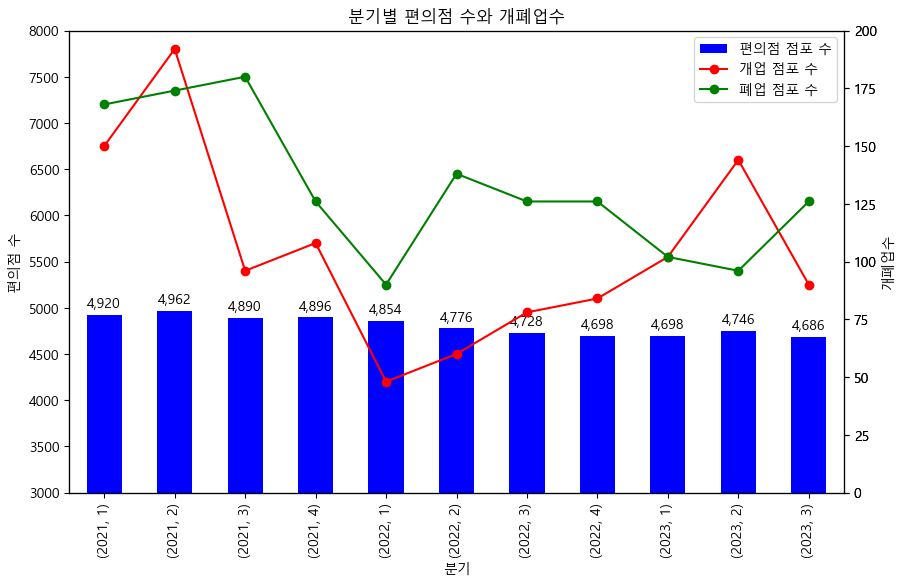

In [13]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기 (유사 업종 점포 수)
ax1 = plt.subplot()
sum_by_year_quarter['유사_업종_점포_수'].plot(kind='bar', color='blue', label='편의점 점포 수', ax=ax1)

# 선 그래프 그리기 (개업 점포 수)
ax2 = ax1.twinx()  # 같은 x축을 사용하는 새로운 서브플롯 생성
sum_by_year_quarter['개업_점포_수'].plot(kind='line', color='red', marker='o', label='개업 점포 수', ax=ax2)

# 두 번째 선 그래프 그리기 (폐업 점포 수)
ax3 = ax1.twinx()  # 같은 x축을 사용하는 새로운 서브플롯 생성
sum_by_year_quarter['폐업_점포_수'].plot(kind='line', color='green', marker='o', label='폐업 점포 수', ax=ax3)

# y 축 범위 설정
ax1.set_ylim(3000, 8000)  # 막대 그래프의 y 축 범위 설정
ax2.set_ylim(0, 200)  # 첫 번째 선 그래프의 y 축 범위 설정
ax3.set_ylim(0, 200)  # 두 번째 선 그래프의 y 축 범위 설정

# y 축 간격 설정
ax1.yaxis.set_ticks(np.arange(3000, 8001, step=500))  # y 축 간격을 500으로 설정

# 막대에 숫자 표시
for i, v in enumerate(sum_by_year_quarter['유사_업종_점포_수']):
    ax1.text(i, v + 50, '{:,.0f}'.format(v), ha='center', va='bottom')

# 그래프 제목과 축 이름 설정
plt.title('분기별 편의점 수와 개폐업수')
ax1.set_xlabel('분기')
ax1.set_ylabel('편의점 수')
ax2.set_ylabel('개폐업수')

# 범례 항목 생성
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

# x축 눈금 라벨 회전
plt.xticks(rotation=00)

# 그래프 표시
plt.show()

- 분기마다 대부분 편의점 개업 점포 수보다 폐업 점포 수가 더 많음
- 편의점 수는 조금씩 줄어드는 추이를 보이나, 거의 비슷한 수준 기록 중

#### 2021 ~ 2023년 분기별 편의점 매출 추이

In [14]:
# 각 연도별 분기별 시간대_매출금액의 합 계산
for year in [2021, 2022, 2023]:
    max_quarter = 4 if year !=2023 else 3
    for quarter in range(1, max_quarter + 1):
        total_sales_amount = data[(data['기준_년'] == year) & (data['기준_분기'] == quarter)]['시간대_매출금액'].sum()
        print(f"{year}년 {quarter}분기 시간대_매출금액의 합:", total_sales_amount)

2021년 1분기 시간대_매출금액의 합: 112464080990.0
2021년 2분기 시간대_매출금액의 합: 130844020184.0
2021년 3분기 시간대_매출금액의 합: 137348888869.0
2021년 4분기 시간대_매출금액의 합: 139954234887.0
2022년 1분기 시간대_매출금액의 합: 133727630001.0
2022년 2분기 시간대_매출금액의 합: 151676013797.0
2022년 3분기 시간대_매출금액의 합: 164666343615.0
2022년 4분기 시간대_매출금액의 합: 162682197336.0
2023년 1분기 시간대_매출금액의 합: 155556408835.0
2023년 2분기 시간대_매출금액의 합: 163228898761.0
2023년 3분기 시간대_매출금액의 합: 167533960003.0


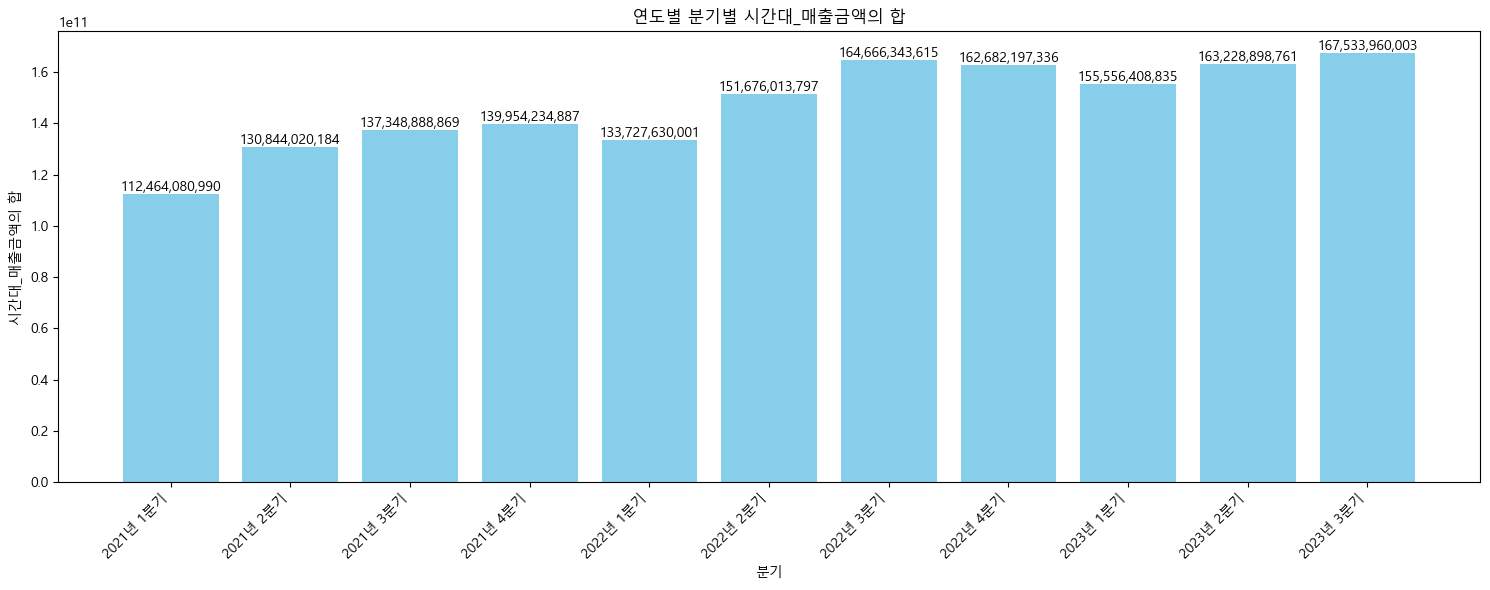

In [15]:
import matplotlib.pyplot as plt
import locale

# 각 연도별 분기별 시간대_매출금액의 합 계산
result = {}
for year in [2021, 2022, 2023]:
    max_quarter = 4 if year !=2023 else 3
    for quarter in range(1, max_quarter + 1):
        total_sales_amount = data[(data['기준_년'] == year) & (data['기준_분기'] == quarter)]['시간대_매출금액'].sum().astype(float)
        result[f"{year}년 {quarter}분기"] = total_sales_amount

# 결과를 막대 그래프로 표시
plt.figure(figsize=(15, 6))
bars = plt.bar(result.keys(), result.values(), color='skyblue')
plt.xlabel('분기')
plt.ylabel('시간대_매출금액의 합')
plt.title('연도별 분기별 시간대_매출금액의 합')
plt.xticks(rotation=45, ha='right')

# 각 막대에 숫자 표시 (회계 형식)
for bar in bars:
    yval = bar.get_height()
    formatted_val = '{:,.0f}'.format(yval)
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_val, va='bottom', ha='center')


plt.tight_layout()
plt.show()

- 위의 그래프에서 편의점 수는 조금씩 줄어드는 추이를 보였으나, 반면에 매출 금액은 조금씩 증가하는 추이 기록

### 시간대별 평균 매출과 평균 유동인구수

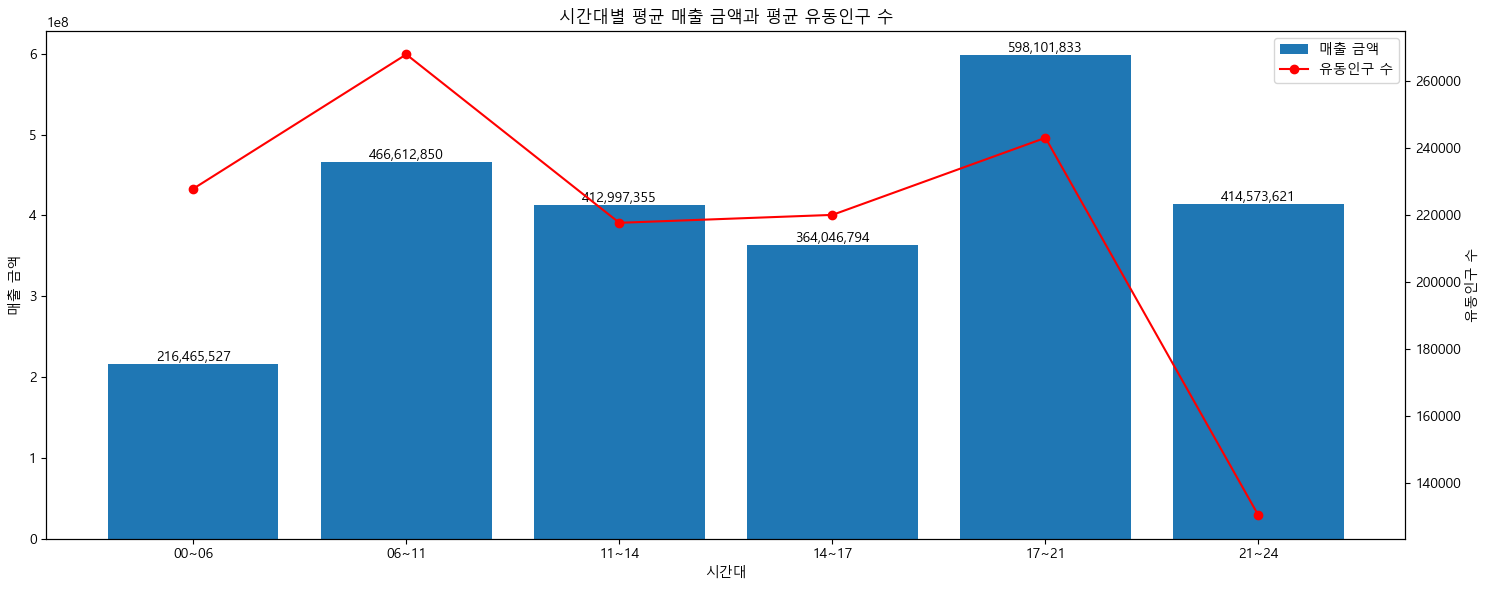

In [16]:
# 시간대별 매출 금액 합산
time_sales_revenue = data.groupby('시간대')['시간대_매출금액'].mean()

# 시간대별 유동인구 합산
time_sales_population = data.groupby('시간대')['시간대_유동인구_수'].mean()

# 그래프 시각화
fig, ax1 = plt.subplots(figsize=(15, 6))

# 막대 그래프 (매출 금액)
color = 'tab:blue'
ax1.set_xlabel('시간대')
ax1.set_ylabel('매출 금액')
ax1.bar(time_sales_revenue.index, time_sales_revenue, color=color, label='매출 금액')
ax1.tick_params(axis='y')

# 선 그래프 (유동인구 수)
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('유동인구 수')
ax2.plot(time_sales_population.index, time_sales_population, color=color, marker='o', label='유동인구 수')
ax2.tick_params(axis='y')

# 그래프 제목
plt.title('시간대별 평균 매출 금액과 평균 유동인구 수')

# 막대에 숫자 표시
for i, v in enumerate(time_sales_revenue):
    ax1.text(i, v, '{:,.0f}'.format(v), ha='center', va='bottom', color='black')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# x 축 라벨 회전
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


- 출퇴근 시간에 높은 매출을 기록
- 비교적 유동인구가 많을 때 매출이 증가하지만, 21~24 구간대는 유동인구가 크게 줄어들지만 매출은 출퇴근 시간 다음으로 많은 매출을 기록
- 유동인구 수 외에도 다른 변수들이 시간대 매출에 영향을 끼칠 것으로 예상

### 2021~ 2023년 3분기 기준 상권별 점포당 분기 평균 매출액과 분기 평균 점포수

In [17]:
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0


In [18]:
data['시간대별_점포당_매출액'] = data['시간대_매출금액']/data['유사_업종_점포_수']
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적,시간대별_점포당_매출액
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,2.694046e+07
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.589054e+07
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.374695e+07
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.644203e+07
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,3.796411e+07


In [19]:
# 데이터프레임에서 필요한 열만 추출
data_venue = data[['상권_코드_명', '시간대', '시간대별_점포당_매출액']]

# 상권_코드_명별 시간대별_점포당_매출액의 합 구하기
sum_by_market = data_venue.groupby('상권_코드_명')['시간대별_점포당_매출액'].sum()/11

# 점포당 매출 금액이 큰 상권순으로 데이터 확인
sum_by_market = sum_by_market.sort_values(ascending=False)

# 데이터프레임으로 변환
sum_by_market = pd.DataFrame({'상권별_점포당_분기_평균_매출액': sum_by_market})


sum_by_market

,상권별_점포당_분기_평균_매출액
상권_코드_명,
경복아파트교차로,4.698162e+08
수서역,3.547284e+08
윗방죽마을공원,3.447542e+08
대청초등학교,3.281099e+08
매봉역 1번,3.174447e+08
언북중학교,3.064642e+08
은마아파트,2.950446e+08
"강남구청(청담역_8번, 강남세무서)",2.813380e+08
선정릉역 4번,2.690999e+08


In [20]:
# 상권별 분기 평균 점포수
# 데이터프레임에서 필요한 열만 추출
data_q_store = data[['기준_년','기준_분기', '상권_코드_명', '유사_업종_점포_수']]

# 상권_코드_명별 시간대별_점포당_매출액의 합 구하기
data_q_store = data_q_store.groupby(['기준_년', '기준_분기', '상권_코드_명'])['유사_업종_점포_수'].unique()

# 상권 코드별로 분기 평균 유사 업종 점포 수 계산
avg_q_store = data_q_store.groupby('상권_코드_명').mean().apply(lambda x: x[0])


# 데이터프레임으로 변환
avg_q_store = pd.DataFrame(avg_q_store)

# avg_q_store의 순서를 sum_by_market과 동일하게 정렬
avg_q_store = avg_q_store.reindex(sum_by_market.index)

# 결과 확인
avg_q_store

,유사_업종_점포_수
상권_코드_명,
경복아파트교차로,7.454545
수서역,13.000000
윗방죽마을공원,4.181818
대청초등학교,9.272727
매봉역 1번,3.100000
언북중학교,3.000000
은마아파트,15.818182
"강남구청(청담역_8번, 강남세무서)",9.090909
선정릉역 4번,7.000000


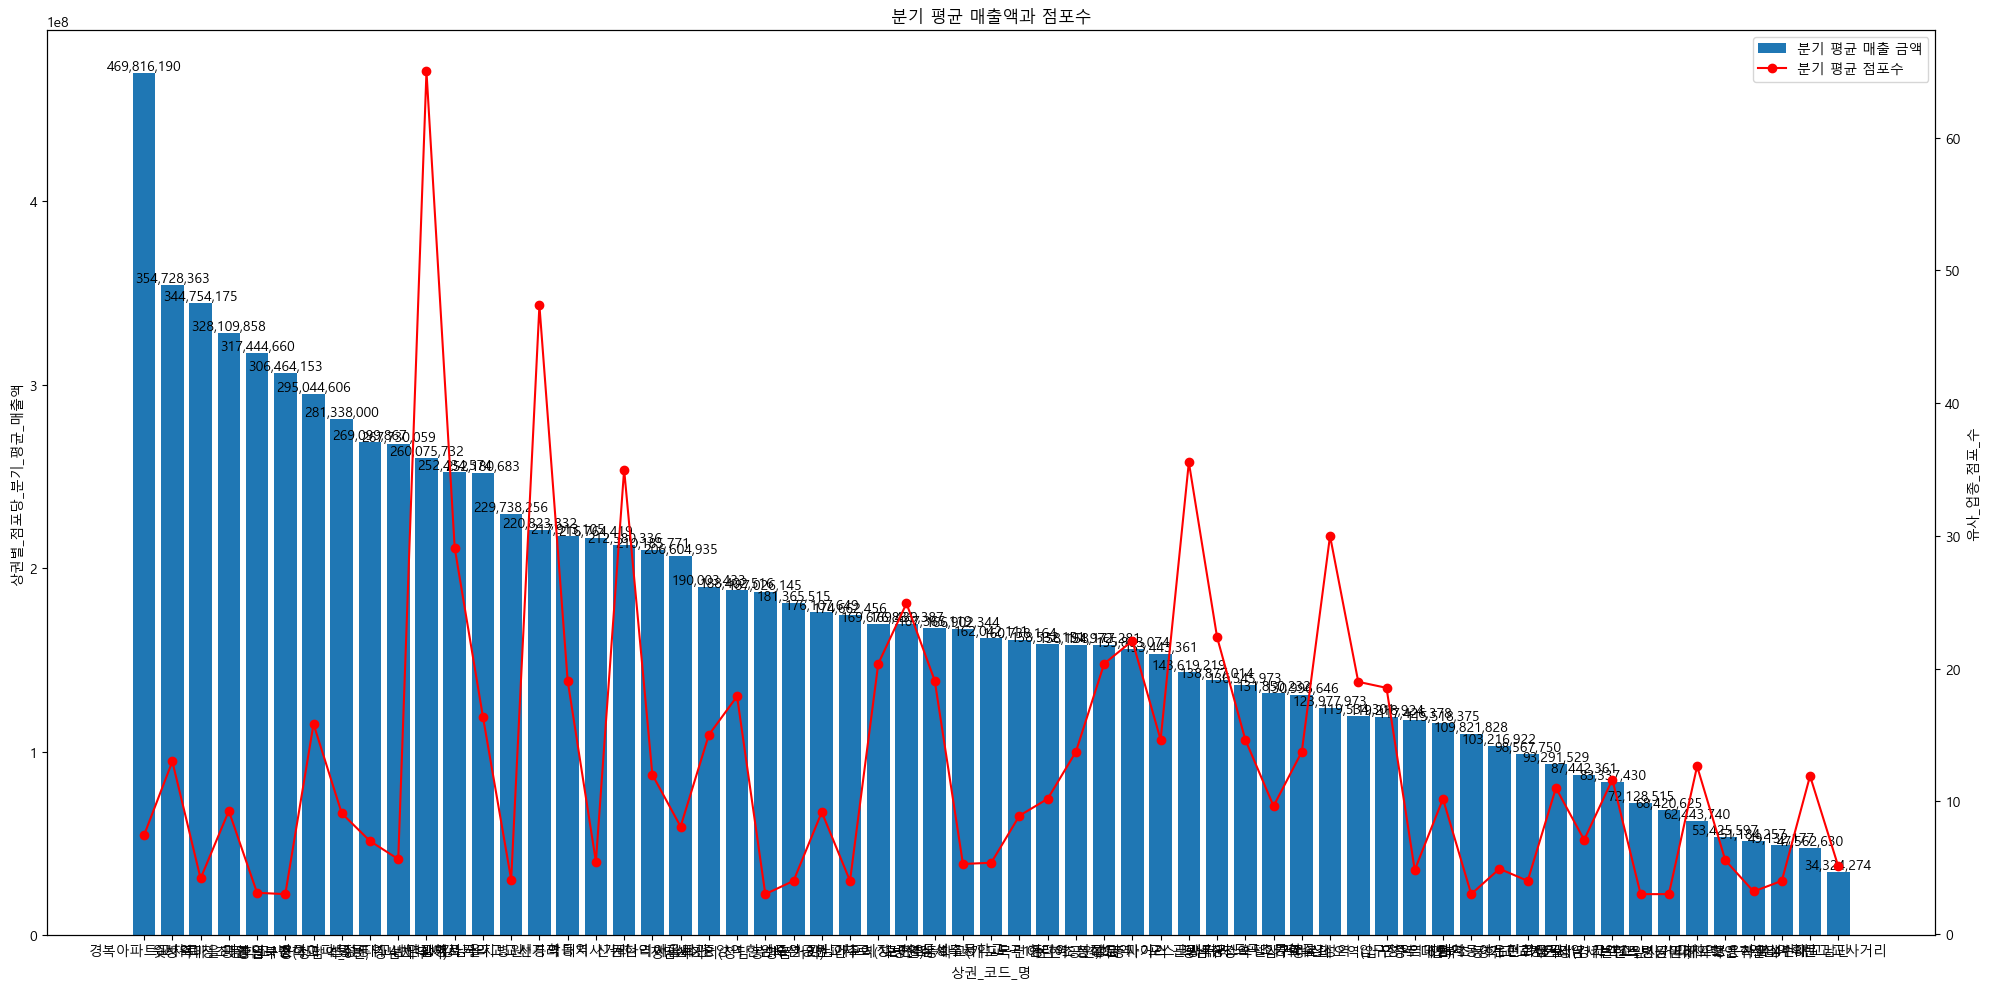

In [21]:
# 그래프 시각화
fig, ax1 = plt.subplots(figsize=(20, 10))

# 막대 그래프 (매출 금액)
color = 'tab:blue'
ax1.set_xlabel('상권_코드_명')
ax1.set_ylabel('상권별_점포당_분기_평균_매출액')
ax1.bar(sum_by_market.index, sum_by_market['상권별_점포당_분기_평균_매출액'], color=color, label='분기 평균 매출 금액')
ax1.tick_params(axis='y')

# 선 그래프 (유동인구 수)
color = 'red'
ax2 = ax1.twinx()
ax2.set_ylabel('유사_업종_점포_수')
ax2.plot(avg_q_store.index, avg_q_store['유사_업종_점포_수'], color=color, marker='o', label='분기 평균 점포수')

# x 축 설정
ax2.set_xticks(range(len(sum_by_market.index)))
ax2.set_xticklabels(sum_by_market.index, rotation=45)

# 그래프 제목
plt.title('분기 평균 매출액과 점포수')

# 막대에 숫자 표시
for i, v in enumerate(sum_by_market['상권별_점포당_분기_평균_매출액']):
    ax1.text(i, v, '{:,.0f}'.format(v), ha='center', va='bottom', color='black')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()


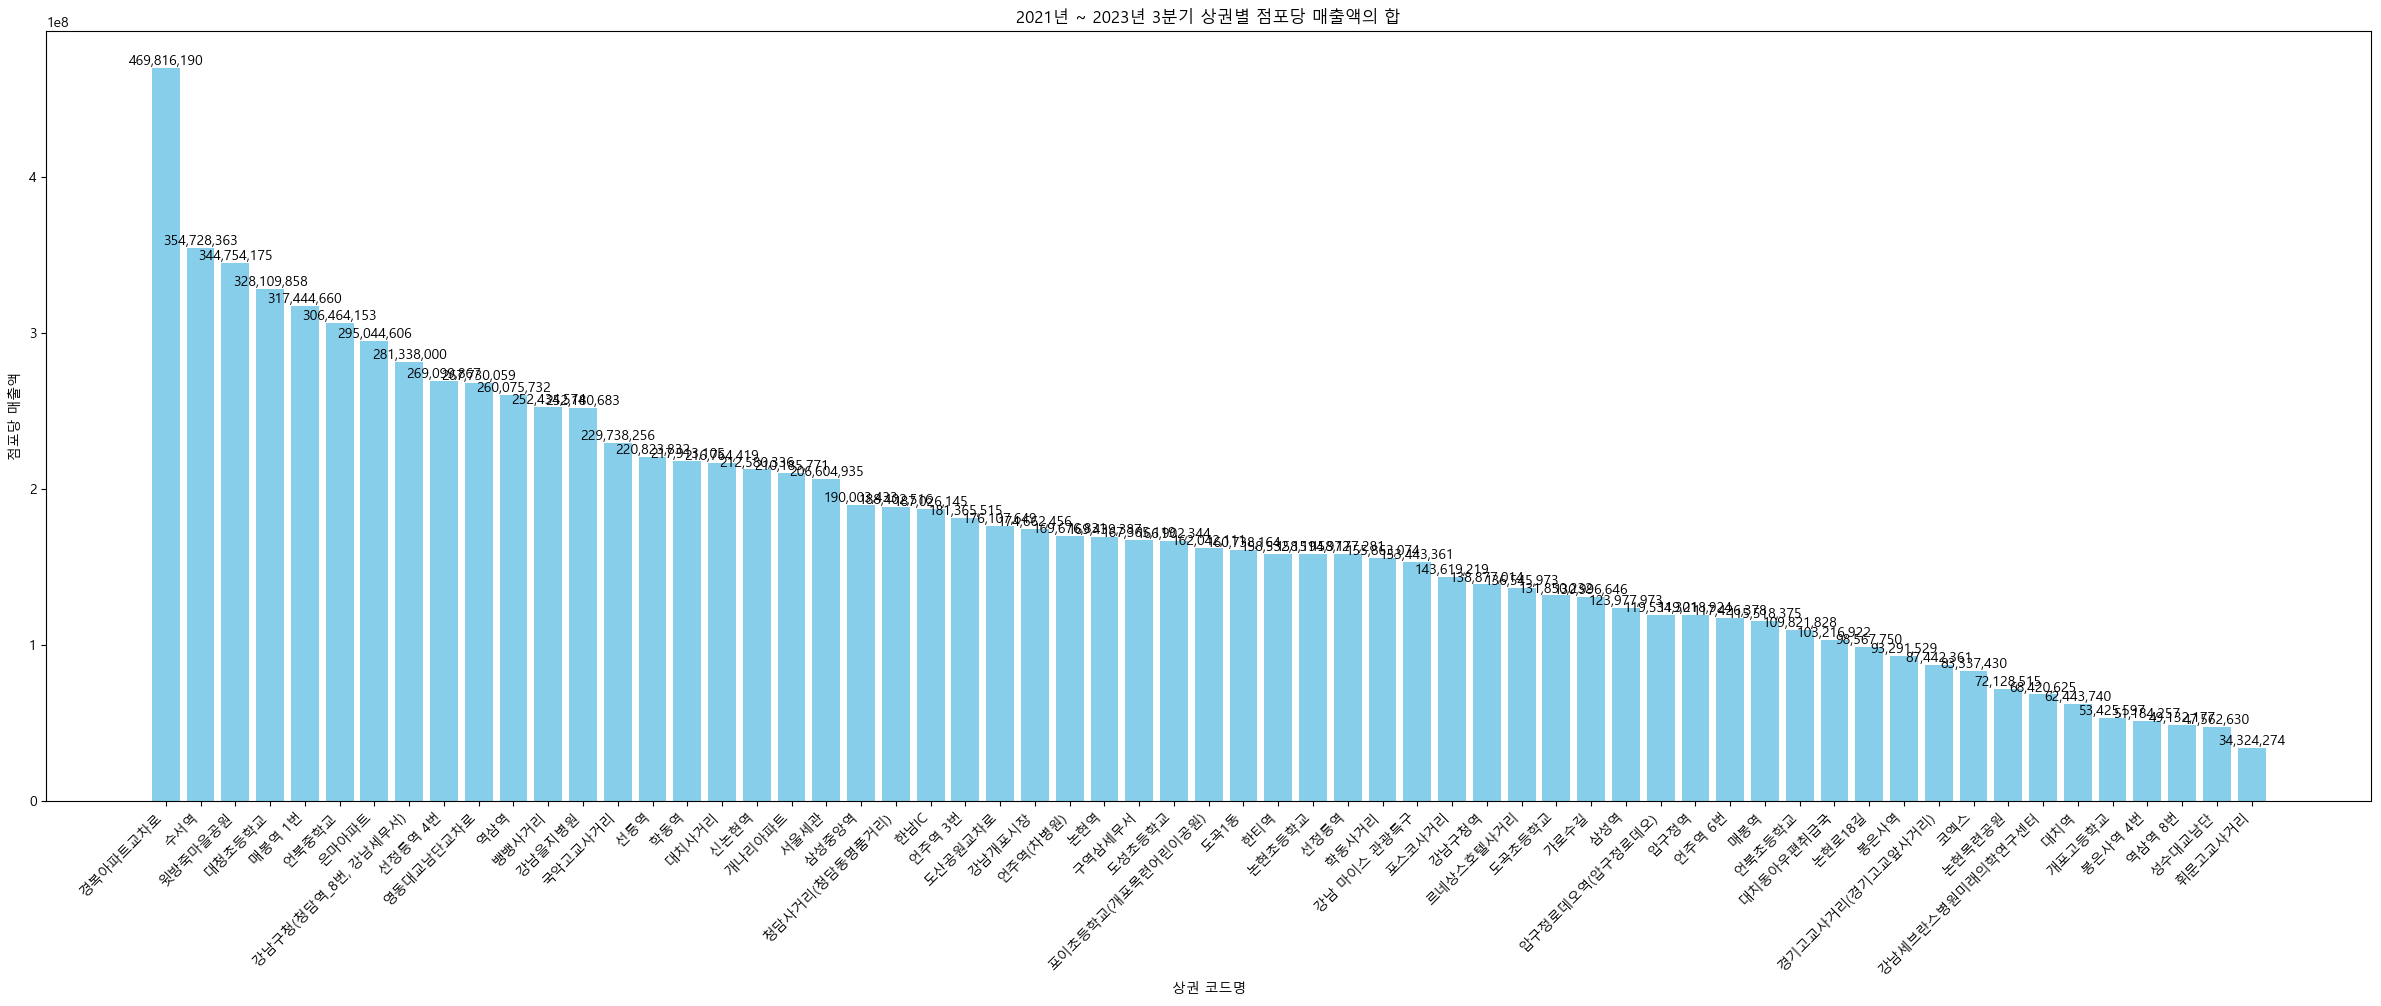

In [22]:
# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(30, 10))

# 막대 그래프 그리기
bars = plt.bar(sum_by_market.index, sum_by_market['상권별_점포당_분기_평균_매출액'], color='skyblue')

# x축 라벨 설정
plt.xlabel('상권 코드명')

# y축 라벨 설정
plt.ylabel('점포당 매출액')

# 그래프 제목 설정
plt.title('2021년 ~ 2023년 3분기 상권별 점포당 매출액의 합')

# x축 눈금 라벨 회전 및 정렬 설정
plt.xticks(rotation=45, ha='right')

# 각 막대에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(height),
             ha='center', va='bottom')

# 그래프 보여주기
plt.show()

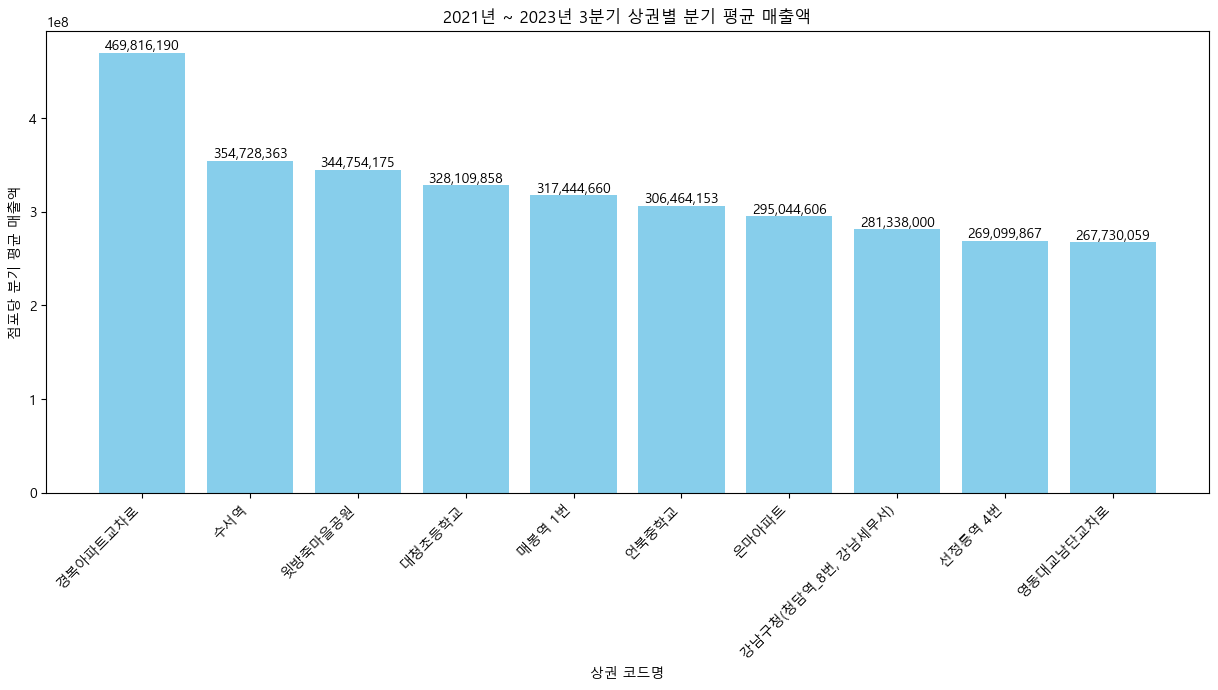

In [23]:
# 상위 10개만
# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(15, 6))

# 상위 10개만 선택
top_10_sum_by_market = sum_by_market.head(10)

# 막대 그래프 그리기
bars = plt.bar(top_10_sum_by_market.index, top_10_sum_by_market['상권별_점포당_분기_평균_매출액'], color='skyblue')

# x축 라벨 설정
plt.xlabel('상권 코드명')

# y축 라벨 설정
plt.ylabel('점포당 분기 평균 매출액')

# 그래프 제목 설정
plt.title('2021년 ~ 2023년 3분기 상권별 분기 평균 매출액')

# x축 눈금 라벨 회전 및 정렬 설정
plt.xticks(rotation=45, ha='right')

# 각 막대에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(height),
             ha='center', va='bottom')

# 그래프 보여주기
plt.show()

- 상권별로 매출액이 다름

#### 임의의 상권을 추출하여 시간대별 매출 확인

In [24]:
# 상권_코드_명이 주어진 조건에 해당하는 데이터 추출
data_venue_selected = data_venue.loc[data_venue['상권_코드_명'].isin(['선정릉역 4번', '영동대교남단교차로', '역삼역	', '뱅뱅사거리', '강남을지병원', '국악고교사거리', '선릉역', '서울세관'])]

# '선정릉역 4번', '윗방죽마을공원', '한남IC	', '언북초등학교', '성수대교남단', '휘문고교사거리', '대치동아우편취급국', '한티역'
# 상권_코드_명별로 그룹화하여 시간대별_점포당_매출액의 합 계산
grouped_data = data_venue_selected.groupby(['상권_코드_명', '시간대'])['시간대별_점포당_매출액'].mean().reset_index()

grouped_data

,상권_코드_명,시간대,시간대별_점포당_매출액
0,강남을지병원,00~06,2.448795e+07
1,강남을지병원,06~11,4.863239e+07
2,강남을지병원,11~14,4.562834e+07
3,강남을지병원,14~17,3.481532e+07
4,강남을지병원,17~21,5.775539e+07
5,강남을지병원,21~24,4.086129e+07
6,국악고교사거리,00~06,2.427092e+07
7,국악고교사거리,06~11,3.729939e+07
8,국악고교사거리,11~14,3.049500e+07
9,국악고교사거리,14~17,3.190243e+07


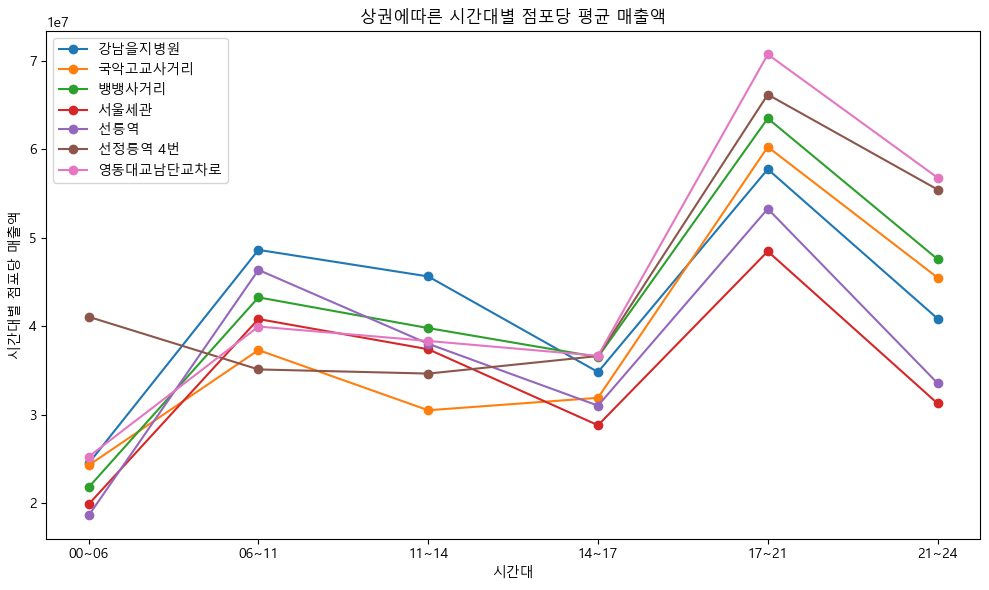

In [25]:
# 각 상권별로 선 그래프 그리기
plt.figure(figsize=(10, 6))
for market_code in grouped_data['상권_코드_명'].unique():
    data_market = grouped_data[grouped_data['상권_코드_명'] == market_code]
    plt.plot(data_market['시간대'], data_market['시간대별_점포당_매출액'], marker='o', label=market_code)

# 그래프 스타일 설정
plt.xlabel('시간대')
plt.ylabel('시간대별 점포당 매출액')
plt.title('상권에따른 시간대별 점포당 평균 매출액')
plt.legend(loc='upper left')
plt.xticks(rotation=0)

# 그래프 표시
plt.tight_layout()
plt.show()

- 임의의 상권을 추출했을 때, 시간대별 매출이 거의 비슷하긴 하나, 상권별로 조금씩 다른 매출 추이를 보임

# 데이터 확인

In [26]:
data = data.drop(columns = ['시간대별_점포당_매출액'])

In [27]:
data.describe()

,기준_년,기준_분기,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적
count,3930.000000,3930.000000,3.930000e+03,3.930000e+03,3930.000000,3930.000000,3930.000000,3930.000000,3.930000e+03,3.930000e+03,3930.000000,3930.000000,3930.000000,3930.000000
mean,2021.920611,2.370992,4.121330e+08,2.178953e+05,10442.225954,2516.425954,1478.433588,46.358779,3.771142e+06,1.741865e+09,13.448855,0.293130,0.369466,178066.922137
std,0.791150,1.069379,4.954507e+08,1.962799e+05,13675.530416,2081.661973,1306.951898,45.825002,7.071014e+05,1.382886e+09,11.458516,0.624908,0.754310,112426.372872
min,2021.000000,1.000000,0.000000e+00,2.129000e+03,117.000000,15.000000,8.000000,0.000000,2.526010e+06,1.291135e+08,3.000000,0.000000,0.000000,17288.000000
25%,2021.000000,1.000000,1.181678e+08,7.275925e+04,1542.000000,976.000000,556.000000,11.000000,3.258234e+06,7.982552e+08,5.000000,0.000000,0.000000,72437.000000
50%,2022.000000,2.000000,2.591656e+08,1.521300e+05,6518.000000,1843.000000,940.000000,35.000000,3.572474e+06,1.239123e+09,10.000000,0.000000,0.000000,149660.000000
75%,2023.000000,3.000000,5.327966e+08,3.268505e+05,12418.000000,3838.000000,2106.000000,75.000000,4.085253e+06,2.489688e+09,18.000000,0.000000,1.000000,256688.000000
max,2023.000000,4.000000,4.043730e+09,1.142220e+06,61667.000000,8225.000000,5072.000000,215.000000,6.241887e+06,7.111261e+09,70.000000,5.000000,6.000000,562807.000000


### 연속형과 범주형 변수 구분

In [28]:
import numpy as np

cat_cols = list(data.select_dtypes(exclude = np.number).columns)
num_cols = list(data.select_dtypes(include = np.number).columns)

print('cat_cols: ',cat_cols)
print('num_cols: ',num_cols)

cat_cols:  ['상권_구분_코드_명', '상권_코드_명', '행정동_코드_명', '시간대']
num_cols:  ['기준_년', '기준_분기', '시간대_매출금액', '시간대_유동인구_수', '총_직장_인구_수', '총_상주인구_수', '총_가구_수', '집객시설_수', '월_평균_소득_금액', '지출_총금액', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수', '영역_면적']


In [29]:
cat_cols = ['기준_년', '기준_분기', '시간대', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명']
num_cols = data.columns.difference(cat_cols).tolist()

In [30]:
print('cat_cols: ',cat_cols)
print('num_cols: ',num_cols)

cat_cols:  ['기준_년', '기준_분기', '시간대', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명']
num_cols:  ['개업_점포_수', '시간대_매출금액', '시간대_유동인구_수', '영역_면적', '월_평균_소득_금액', '유사_업종_점포_수', '지출_총금액', '집객시설_수', '총_가구_수', '총_상주인구_수', '총_직장_인구_수', '폐업_점포_수']


## 데이터 분포 확인

### 숫자형 변수 분포 확인

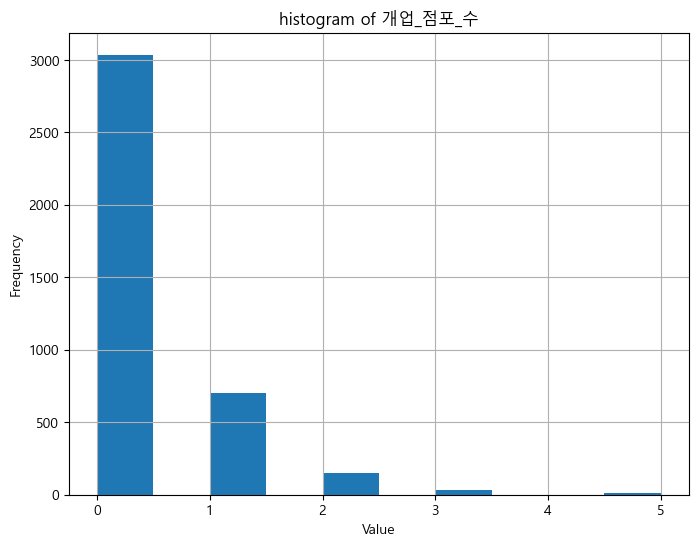

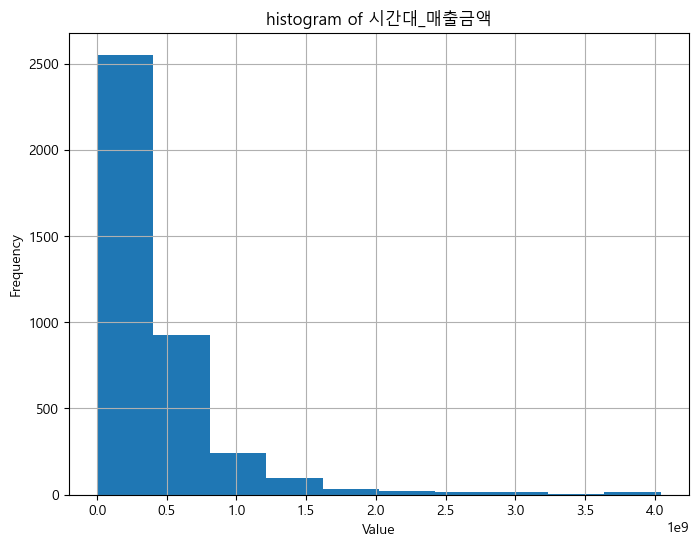

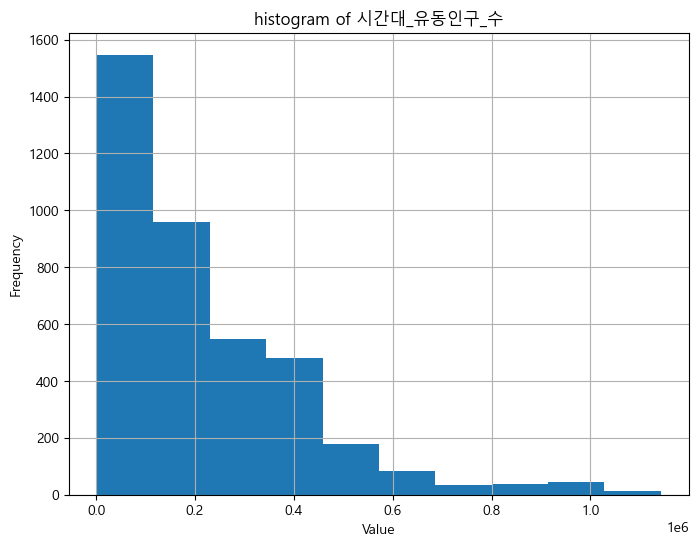

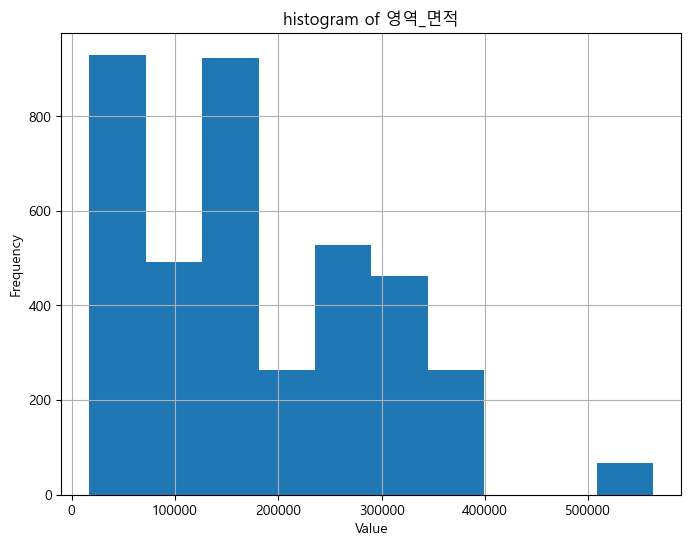

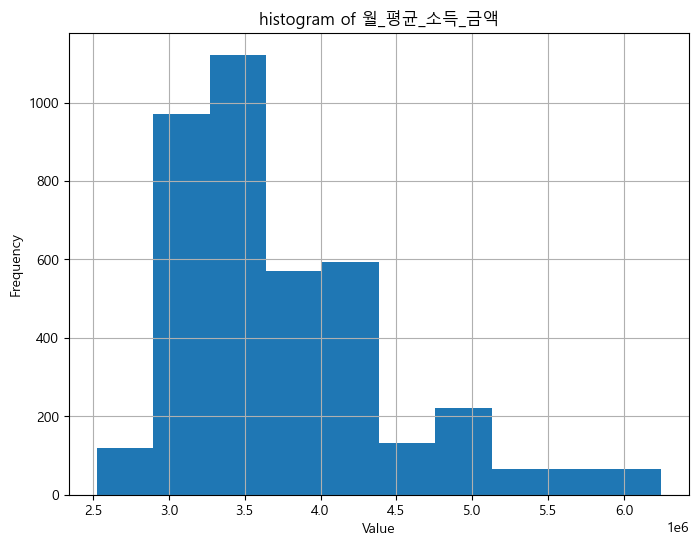

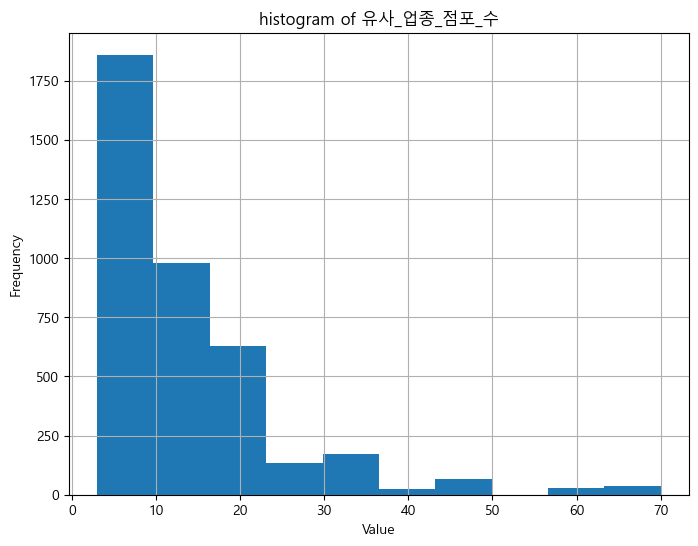

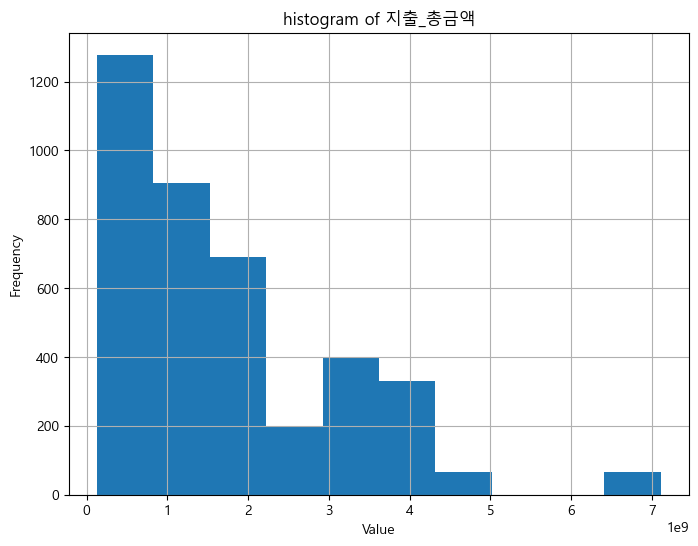

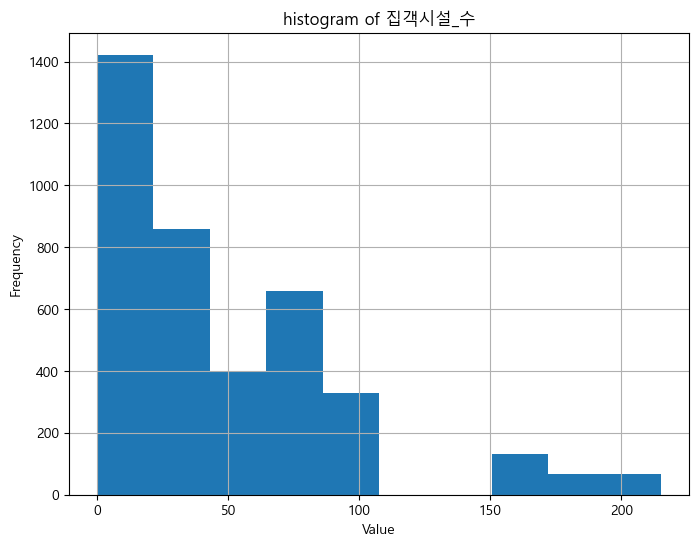

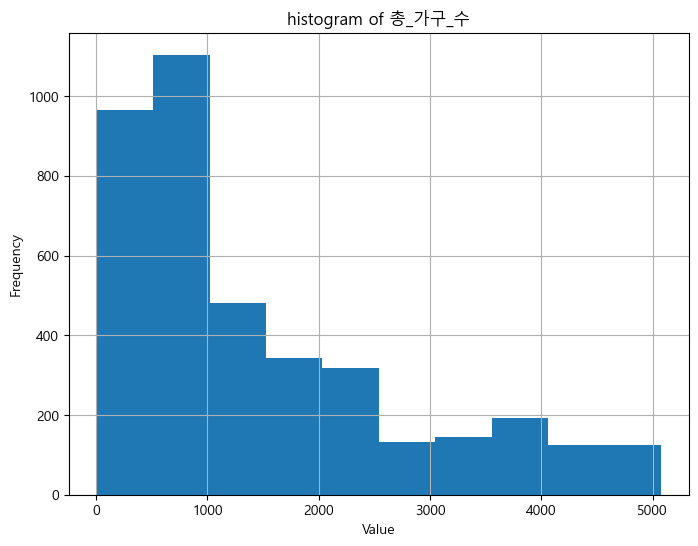

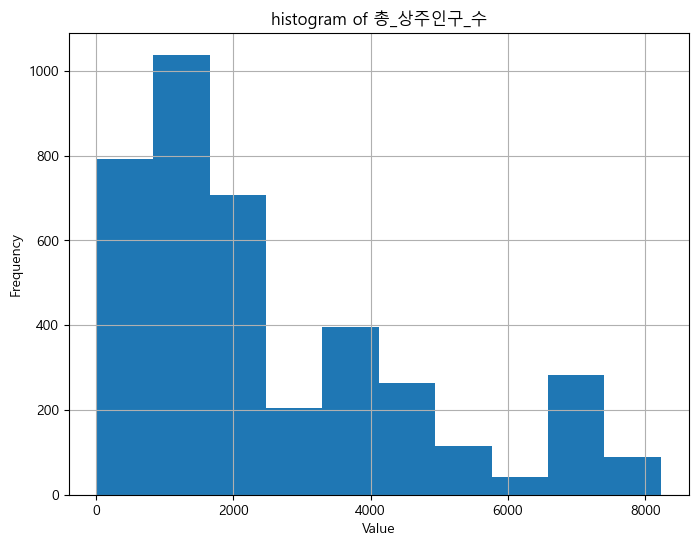

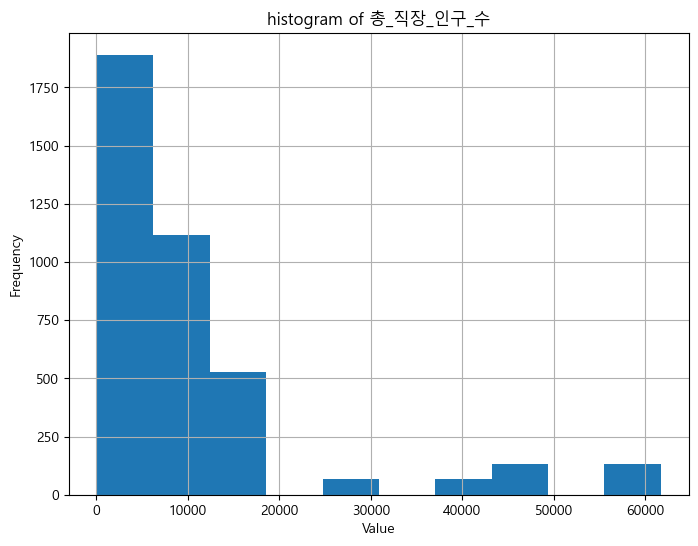

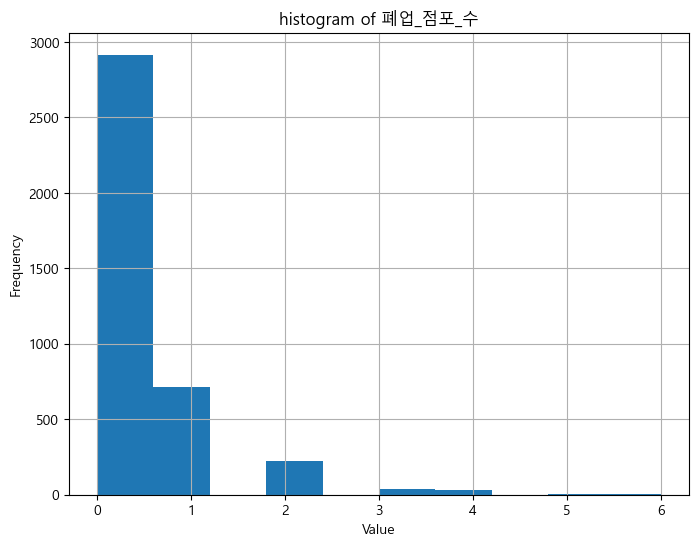

In [31]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

for column in num_cols:
    plt.figure(figsize=(8,6))
    data[column].hist(bins=10)
    plt.title(f'histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

### 범주형 변수 분포 확인

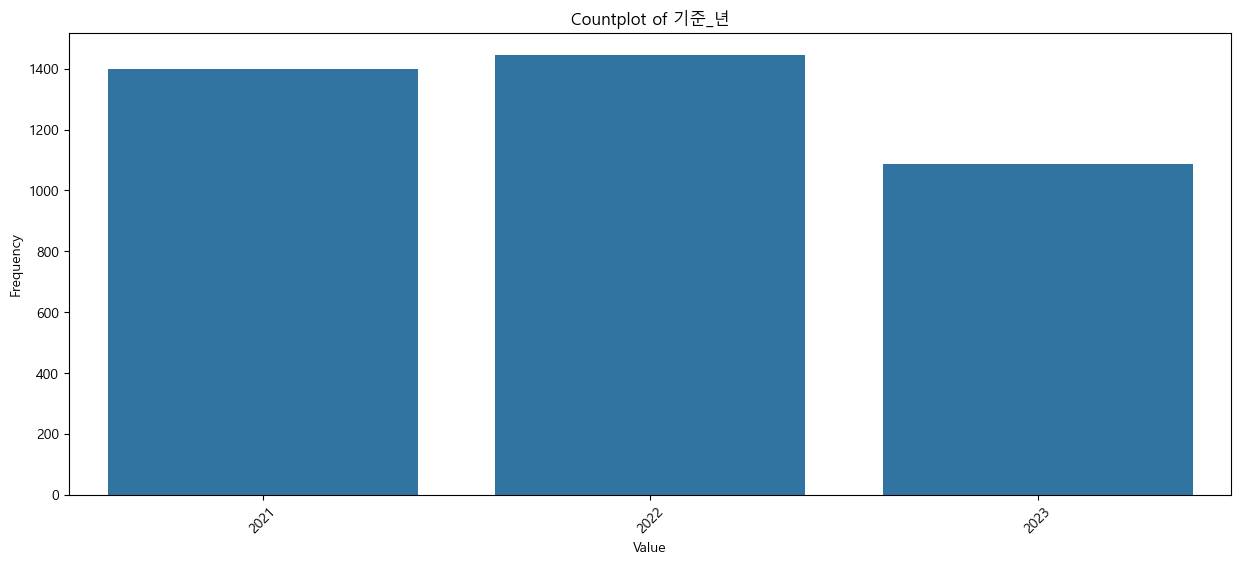

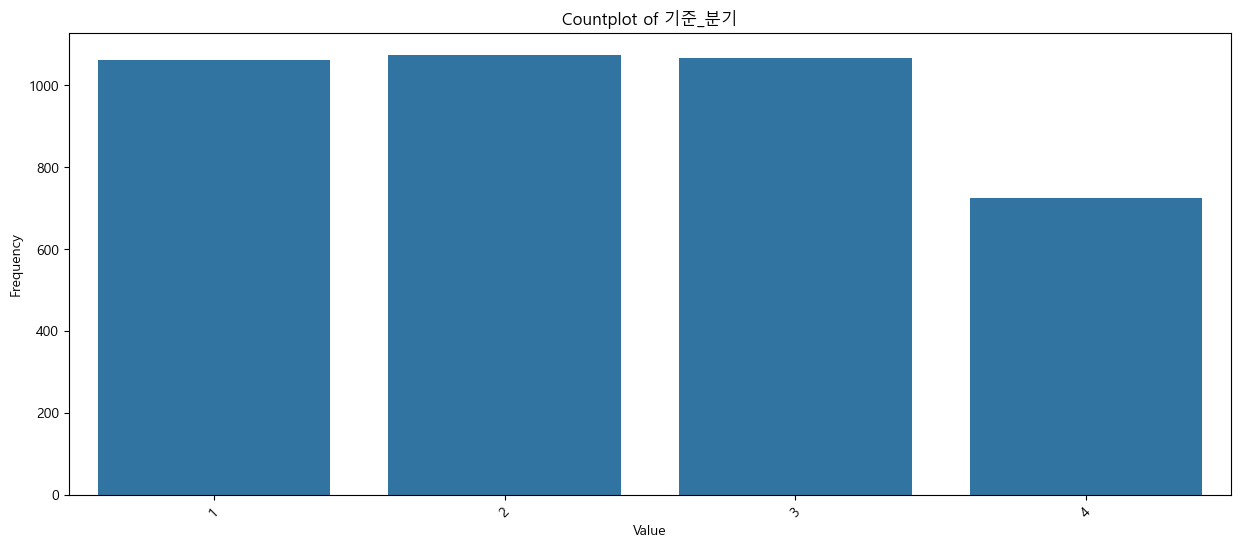

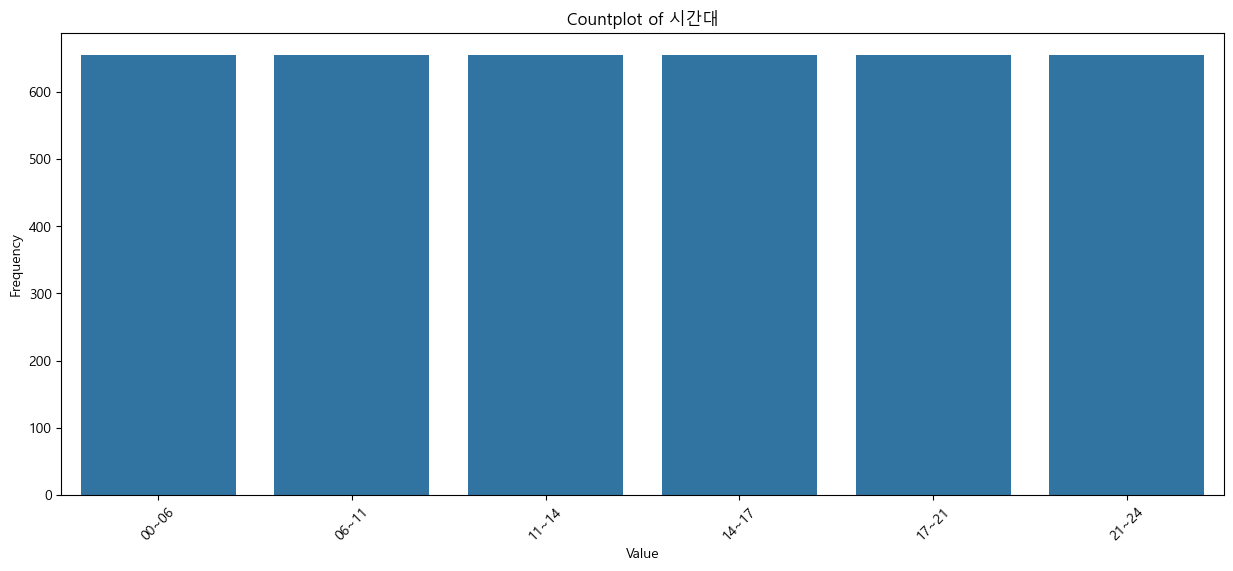

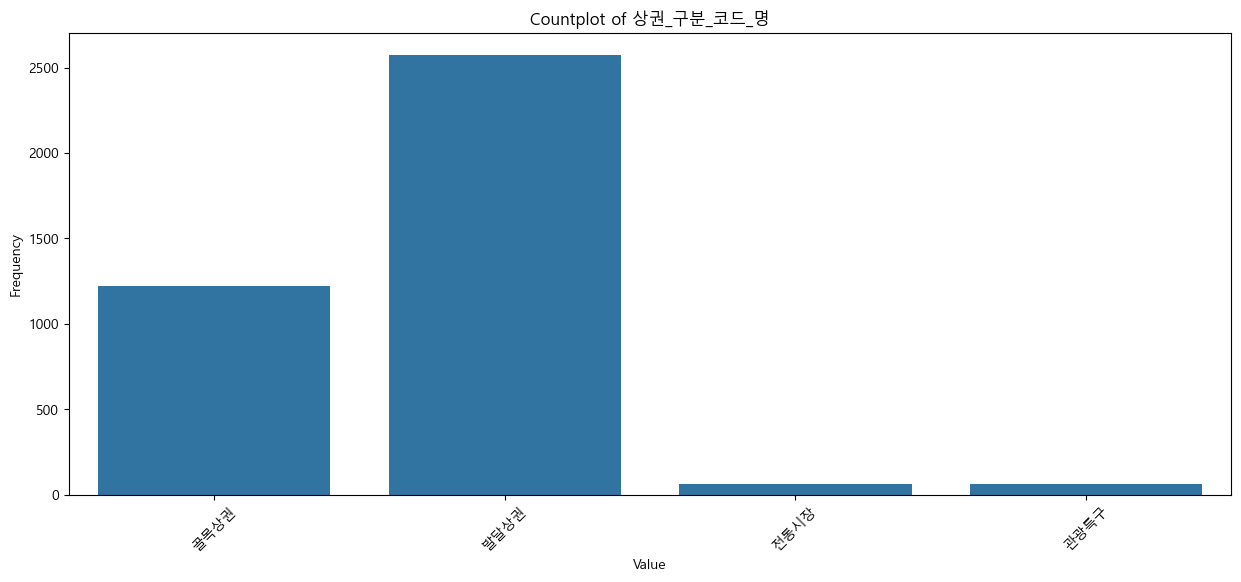

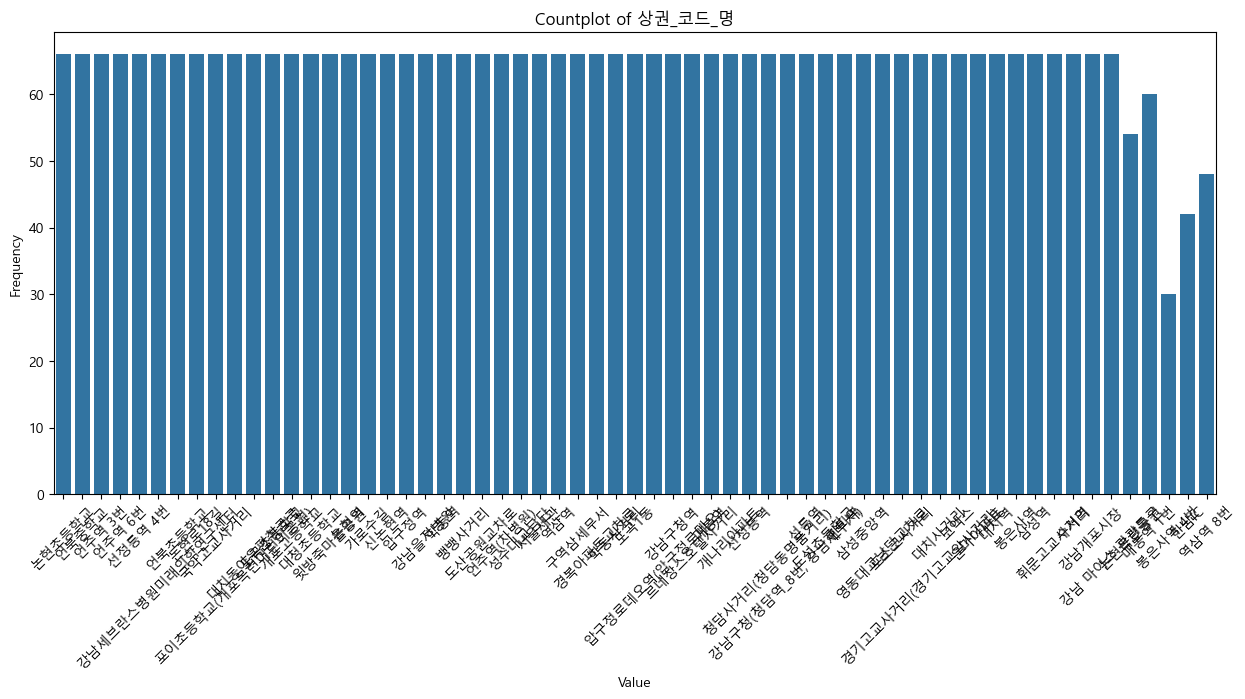

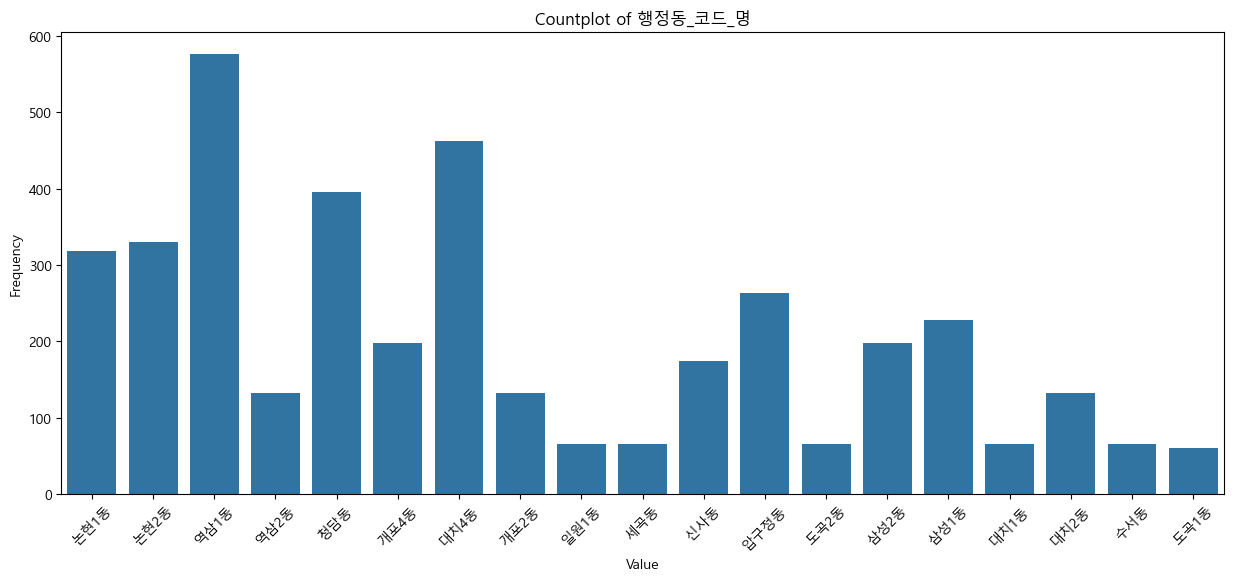

In [32]:
import seaborn as sns

for column in cat_cols:
    plt.figure(figsize=(15,6))
    sns.countplot(data=data, x = column)
    plt.title(f'Countplot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

## 상관분석

### 시간대_매출금액과 관련 있는 변수만 추출

In [33]:
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0


In [34]:
data_corr = data.copy()
data_corr = data_corr.drop(columns=['기준_년', '기준_분기', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명'])
data_corr.head()
                           

,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적
0,00~06,377166450.0,738999.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
1,06~11,222467605.0,621019.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
2,11~14,192457360.0,351383.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
3,14~17,230188421.0,342564.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
4,17~21,531497598.0,433632.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0


### 범주형 변수 더미화

In [35]:
data_corr = pd.get_dummies(data_corr, columns=['시간대'])

In [36]:
data_corr.head()

,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적,시간대_00~06,시간대_06~11,시간대_11~14,시간대_14~17,시간대_17~21,시간대_21~24
0,377166450.0,738999.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,True,False,False,False,False,False
1,222467605.0,621019.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,False,True,False,False,False,False
2,192457360.0,351383.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,False,False,True,False,False,False
3,230188421.0,342564.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,False,False,False,True,False,False
4,531497598.0,433632.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,False,False,False,False,True,False


In [37]:

### 더미 변수화된 값이 불리언 형태로 나왔다면 0과 1로 변환
data_corr.replace({True: 1, False: 0}, inplace=True)

### 숫자형 변수 정규화

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_corr[num_cols] = scaler.fit_transform(data_corr[num_cols])

data_corr.head()

,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적,시간대_00~06,시간대_06~11,시간대_11~14,시간대_14~17,시간대_17~21,시간대_21~24
0,-0.070584,2.655238,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,0.114277,1,0,0,0,0,0
1,-0.382863,2.054081,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,0.114277,0,1,0,0,0,0
2,-0.443442,0.680175,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,0.114277,0,0,1,0,0,0
3,-0.367277,0.635238,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,0.114277,0,0,0,1,0,0
4,0.240952,1.099267,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,0.114277,0,0,0,0,1,0


### 상관분석

In [39]:
correlation_matrix = data_corr.corr()

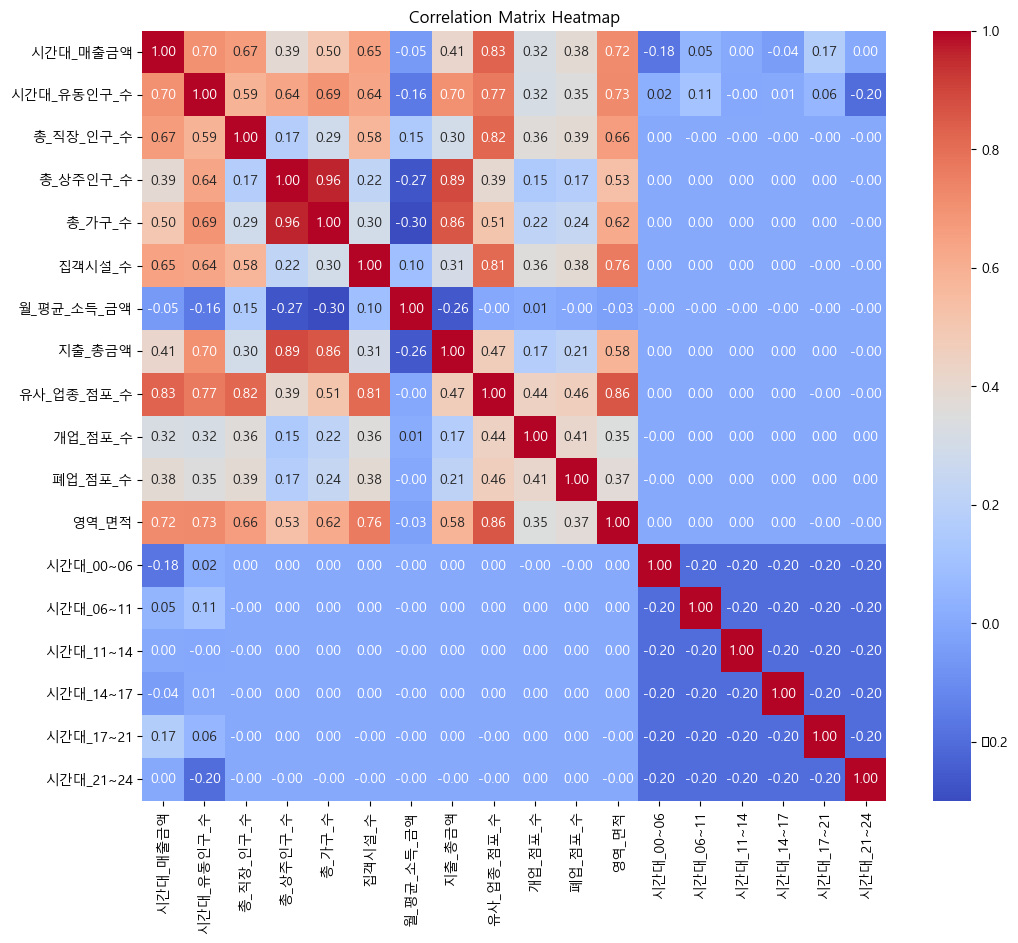

In [40]:
# heatmap 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

- 월평균 소득 금액과 시간대는 편의점 매출과 큰 연관이 없는 것으로 보임

### 회귀분석

In [41]:
import statsmodels.formula.api as smf

model_revenue = smf.ols("시간대_매출금액 ~ 시간대_유동인구_수 + 총_직장_인구_수 + 총_상주인구_수 + 총_가구_수 + 집객시설_수 + 월_평균_소득_금액 + 지출_총금액", 
                        data = data_corr).fit()
model_revenue.summary()                       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               시간대_매출금액   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        10:58:01   Log-Likelihood:                -3435.3
No. Observations:                3930   AIC:                             6887.
Df Residuals:                    3922   BIC:                             6937.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.012e-19      0.009  -9.73e-17      1.000      -0.018       0.018
시간대_유동인구_수     0.2842      0.018     15.381      0.000       0.248       0.320
총_직장_인구_수      0.3116      0.014     22.692      0.000       0.285       0.339
총_상주인구_수      -0.2742      0.045     -6.100      0.000      -0.362      -0.186
총_가구_수         0.5835      0.039     14.788      0.000       0.506       0.661
집객시설_수         0.2475      0.013     18.645      0.000       0.221       0.274
월_평균_소득_금액    -0.0360      0.011     -3.410      0.001      -0.057      -0.015
지출_총금액        -0.2226      0.023     -9.665      0.000      -0.268      -0.177
==============================================================================
Omnibus:                     1318.774   Durbin-Watson:                   1.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10269.962
Skew:                           1.382   Prob(JB):                         0.00
Kurtosis:                      10.421   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 모든 독립변수가 통계적으로 유의함
- 시간대_유동인구_수, 총_직장_인구_수, 총_가구_수, 집객시설_수가 증가할 때 시간대_매출금액도 증가하는 경향
- 총_상주인구_수, 월_평균_소득_금액, 지출_총금액이 증가할 때 시간대_매출금액은 감소하는 경향
- Cond. No.이 12.6으로 조건수가 높아 다중공선성 확인 필요

### 다중공선성 확인

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성을 계산할 독립 변수들을 선택
X = data_corr[['시간대_유동인구_수', '총_직장_인구_수', '총_상주인구_수', '총_가구_수', '집객시설_수', '월_평균_소득_금액', '지출_총금액']]

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,3.982291,시간대_유동인구_수
1,2.199298,총_직장_인구_수
2,23.560863,총_상주인구_수
3,18.155181,총_가구_수
4,2.055181,집객시설_수
5,1.297316,월_평균_소득_금액
6,6.183107,지출_총금액


- '총_상주인구_수'와 '총_가구_수'의 다중공선성이 높아 둘 중 하나 제거 필요

In [43]:
model_revenue = smf.ols("시간대_매출금액 ~ 시간대_유동인구_수 + 총_상주인구_수 + 총_가구_수 + 집객시설_수 + 월_평균_소득_금액 + 지출_총금액", 
                        data = data_corr).fit()
model_revenue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               시간대_매출금액   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1065.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        10:58:02   Log-Likelihood:                -3677.7
No. Observations:                3930   AIC:                             7369.
Df Residuals:                    3923   BIC:                             7413.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.012e-19      0.010  -9.15e-17      1.000      -0.019       0.019
시간대_유동인구_수     0.4265      0.018     23.068      0.000       0.390       0.463
총_상주인구_수      -0.6957      0.044    -15.981      0.000      -0.781      -0.610
총_가구_수         0.8987      0.039     22.881      0.000       0.822       0.976
집객시설_수         0.2977      0.014     21.380      0.000       0.270       0.325
월_평균_소득_금액     0.0355      0.011      3.313      0.001       0.014       0.056
지출_총금액        -0.1214      0.024     -5.053      0.000      -0.169      -0.074
==============================================================================
Omnibus:                     1573.437   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14062.518
Skew:                           1.662   Prob(JB):                         0.00
Kurtosis:                      11.651   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model_revenue = smf.ols("시간대_매출금액 ~ 시간대_유동인구_수 + 총_직장_인구_수 + 총_가구_수 + 집객시설_수 + 월_평균_소득_금액 + 지출_총금액", 
                        data = data_corr).fit()
model_revenue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               시간대_매출금액   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1272.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        10:58:02   Log-Likelihood:                -3453.8
No. Observations:                3930   AIC:                             6922.
Df Residuals:                    3923   BIC:                             6966.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.012e-19      0.009  -9.69e-17      1.000      -0.018       0.018
시간대_유동인구_수     0.2810      0.019     15.141      0.000       0.245       0.317
총_직장_인구_수      0.3463      0.013     27.561      0.000       0.322       0.371
총_가구_수         0.3722      0.019     19.623      0.000       0.335       0.409
집객시설_수         0.2581      0.013     19.524      0.000       0.232       0.284
월_평균_소득_금액    -0.0525      0.010     -5.130      0.000      -0.073      -0.032
지출_총금액        -0.3014      0.019    -15.744      0.000      -0.339      -0.264
==============================================================================
Omnibus:                     1267.230   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9127.517
Skew:                           1.343   Prob(JB):                         0.00
Kurtosis:                       9.966   Cond. No.                         4.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- '총_상주_인구_수'를 제거했을 때 모델의 설명력이 더 높아 '총_상주_인구_수' 컬럼 제거하고 모델링하였으나, 컬럼을 제거하지 않고 모델을 돌렸을 때 성능이 더 우수함

# 모델링

In [45]:
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,7026.0,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0


### 선형회귀분석

### 데이터 전처리

In [32]:
print('cat_cols: ',cat_cols)
print('num_cols: ',num_cols)


cat_cols:  ['기준_년', '기준_분기', '시간대', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명']
num_cols:  ['시간대_매출금액', '시간대_유동인구_수', '월_평균_소득_금액', '지출_총금액', '집객시설_수', '총_가구_수', '총_상주인구_수', '총_직장_인구_수']


In [33]:
# 범주형 변수 더미화
data = pd.get_dummies(data, columns=cat_cols)

### 더미 변수화된 값이 불리언 형태로 나왔다면 0과 1로 변환
data.replace({True: 1, False: 0}, inplace=True)

# 숫자형 변수 정규화
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()

,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,기준_년_2021,기준_년_2022,기준_년_2023,기준_분기_1,기준_분기_2,기준_분기_3,기준_분기_4,시간대_00~06,시간대_06~11,시간대_11~14,시간대_14~17,시간대_17~21,시간대_21~24,상권_구분_코드_명_골목상권,상권_구분_코드_명_관광특구,상권_구분_코드_명_발달상권,상권_구분_코드_명_전통시장,상권_코드_명_가로수길,상권_코드_명_강남 마이스 관광특구,상권_코드_명_강남개포시장,"상권_코드_명_강남구청(청담역_8번, 강남세무서)",상권_코드_명_강남구청역,상권_코드_명_강남세브란스병원미래의학연구센터,상권_코드_명_강남을지병원,상권_코드_명_개나리아파트,상권_코드_명_개포고등학교,상권_코드_명_경기고교사거리(경기고교앞사거리),상권_코드_명_경복아파트교차로,상권_코드_명_구역삼세무서,상권_코드_명_국악고교사거리,상권_코드_명_논현로18길,상권_코드_명_논현목련공원,상권_코드_명_논현역,상권_코드_명_논현초등학교,상권_코드_명_대청초등학교,상권_코드_명_대치동아우편취급국,상권_코드_명_대치사거리,상권_코드_명_대치역,상권_코드_명_도곡1동,상권_코드_명_도곡초등학교,상권_코드_명_도산공원교차로,상권_코드_명_도성초등학교,상권_코드_명_르네상스호텔사거리,상권_코드_명_매봉역,상권_코드_명_매봉역 1번,상권_코드_명_뱅뱅사거리,상권_코드_명_봉은사역,상권_코드_명_봉은사역 4번,상권_코드_명_삼성역,상권_코드_명_삼성중앙역,상권_코드_명_서울세관,상권_코드_명_선릉역,상권_코드_명_선정릉역,상권_코드_명_선정릉역 4번,상권_코드_명_성수대교남단,상권_코드_명_수서역,상권_코드_명_신논현역,상권_코드_명_압구정로데오역(압구정로데오),상권_코드_명_압구정역,상권_코드_명_언북중학교,상권_코드_명_언북초등학교,상권_코드_명_언주역 3번,상권_코드_명_언주역 6번,상권_코드_명_언주역(차병원),상권_코드_명_역삼역,상권_코드_명_역삼역 8번,상권_코드_명_영동대교남단교차로,상권_코드_명_윗방죽마을공원,상권_코드_명_은마아파트,상권_코드_명_청담사거리(청담동명품거리),상권_코드_명_코엑스,상권_코드_명_포스코사거리,상권_코드_명_포이초등학교(개포목련어린이공원),상권_코드_명_학동사거리,상권_코드_명_학동역,상권_코드_명_한남IC,상권_코드_명_한티역,상권_코드_명_휘문고교사거리,행정동_코드_명_개포2동,행정동_코드_명_개포4동,행정동_코드_명_논현1동,행정동_코드_명_논현2동,행정동_코드_명_대치1동,행정동_코드_명_대치2동,행정동_코드_명_대치4동,행정동_코드_명_도곡1동,행정동_코드_명_도곡2동,행정동_코드_명_삼성1동,행정동_코드_명_삼성2동,행정동_코드_명_세곡동,행정동_코드_명_수서동,행정동_코드_명_신사동,행정동_코드_명_압구정동,행정동_코드_명_역삼1동,행정동_코드_명_역삼2동,행정동_코드_명_일원1동,행정동_코드_명_청담동
0,-0.070584,2.655238,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.382863,2.054081,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.443442,0.680175,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.367277,0.635238,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.240952,1.099267,-0.512822,2.166609,2.308387,-0.749878,-1.218767,1.981396,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 선형회귀모델 모델링

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 독립변수와 종속변수 분리
y = data.pop('시간대_매출금액')
X = data

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# 모델 학습
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# 모델 예측
y_pred_train = regression.predict(X_train)
y_pred_test = regression.predict(X_test)

# 모델 평가: 평균 제곱 오차
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("훈련 데이터 MSE:", mse_train)
print("테스트 데이터 MSE:", mse_test)

훈련 데이터 MSE: 0.10302359950351608
테스트 데이터 MSE: 0.08633907646393302


In [36]:
from sklearn.metrics import r2_score 
r2 = r2_score(y_pred_test, y_test)
r2

0.8848788370286897

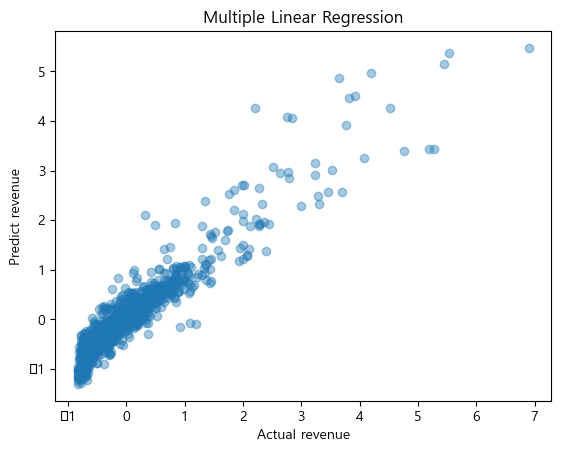

In [38]:
plt.scatter(y_test, y_pred_test, alpha = 0.4)
plt.xlabel('Actual revenue')
plt.ylabel('Predict revenue')
plt.title('Multiple Linear Regression')
plt.show()